In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Matplotlib is used to plot the data points and seaborn used to add more color palltes in that to make it more attractive and presentable.

In [2]:
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
ds = pd.read_csv(Path, names= ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] )
ds.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
ds.describe() # gives more details about dataset

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# let's implement data pre-processing.
X = ds.iloc[:, :-1]
y = ds.iloc[:, 4]

In [21]:
# Spliting the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data. Here we are making random_state=0 to keep the same train and test sets across different executions.

In [22]:
# Let's do the scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

As a interview, we should know
*   What is the neccessity of standard scaler, scaler.fit and scaler.transform?
Answer:
sometime we have data in range from 1 to 200 and other data in range of different range so will create problem in comparing so normalization is required using mean and SD. data-mean/SD will normalize the data.
scaler.fit will calculate mean and SD and scaler.transform will actually normalize the data by using mean and SD.


In [23]:
#Naive Bayes Also
#Train the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [24]:
y_pred = classifier.predict(X_train)

In [25]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


In [31]:
#Test
y_pred = classifier.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


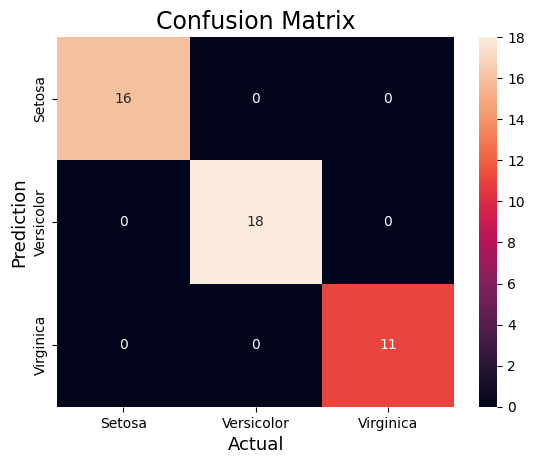

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [34]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


**SVM**

In [35]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9714285714285714
accuracy of poly is 0.9142857142857143
accuracy of rbf is 0.9714285714285714
accuracy of sigmoid is 0.8761904761904762


In [37]:

accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

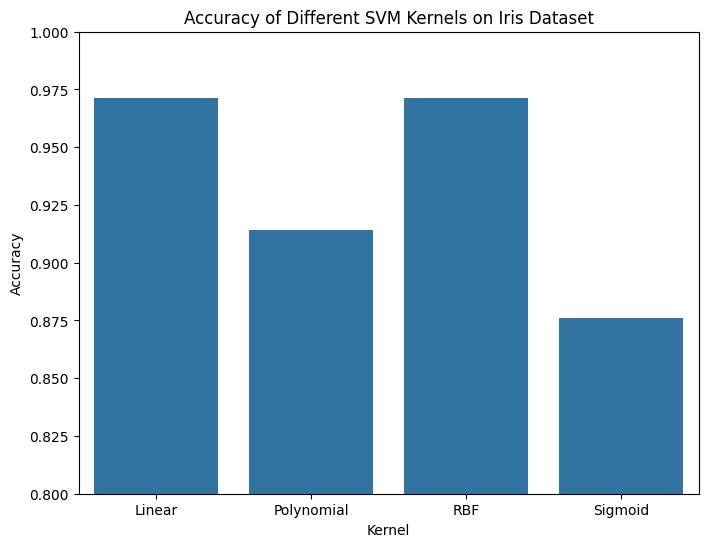

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

In [39]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9777777777777777
accuracy of poly is 0.8888888888888888
accuracy of rbf is 0.9777777777777777
accuracy of sigmoid is 0.8666666666666667


In [40]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

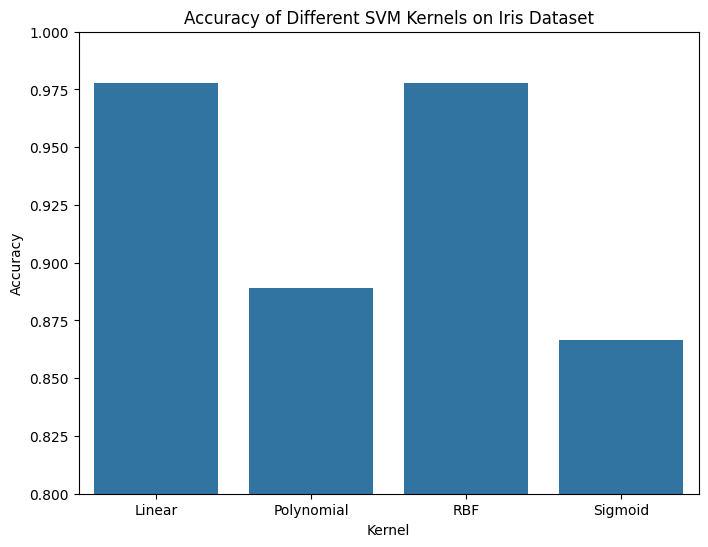

In [41]:

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()


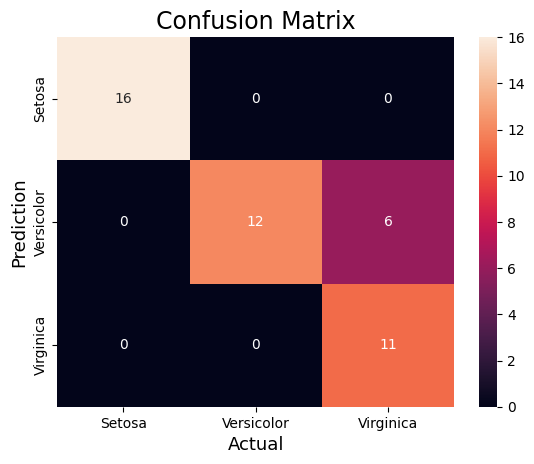

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:

y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9714285714285714


In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [46]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9619047619047619
